In [35]:
import sklearn
import numpy as np;
import pandas as pd;
import seaborn as sns;

In [36]:
Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }
df = pd.DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price']) 

In [37]:
df.head()

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


In [38]:
df.corr()

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
Year,1.000000,0.000000,0.882851,-0.877000,0.863232
Month,0.000000,1.000000,0.339526,-0.351189,0.481287
Interest_Rate,0.882851,0.339526,1.000000,-0.925814,0.935793
Unemployment_Rate,-0.877000,-0.351189,-0.925814,1.000000,-0.922338
Stock_Index_Price,0.863232,0.481287,0.935793,-0.922338,1.000000


Year and Month is not required , we are interested in corelation between Interest_Rate & Unemployment_Rate & Stock_Index_Price

Clearly we can see that there is a positive correlation between  Interest_Rate & Stock_Index_Price and highly negative correlation between Unemployment_Rate & Stock_Index_Price.

We can observe same thing from jointplot also as below

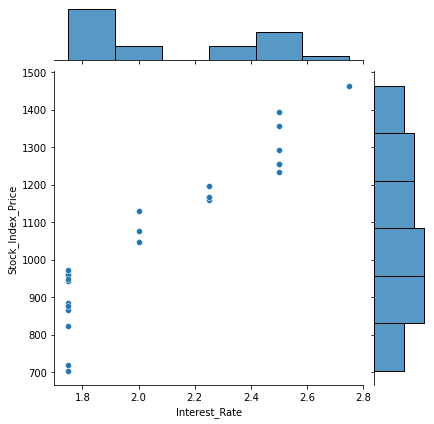

In [39]:
sns.jointplot(x="Interest_Rate",y="Stock_Index_Price",data=df)

Observation:-
-------------

# Clearly Positively Correlated

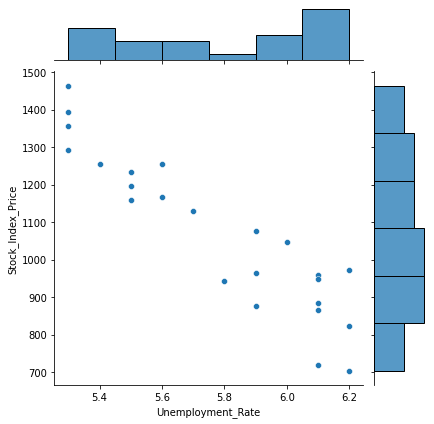

In [40]:
sns.jointplot(x="Unemployment_Rate",y="Stock_Index_Price",data=df)

Observation:-
-------------

# Clearly Negatively Correlated

In [41]:
x=df[['Interest_Rate','Unemployment_Rate']];#Concept: More than one column extraction , so [[]]
y=df['Stock_Index_Price'];

In [42]:
from sklearn.linear_model import LinearRegression;

In [43]:
lm3=LinearRegression()
lm3.fit(x,y)
print(lm3.intercept_,lm3.coef_)

1798.4039776258546 [ 345.54008701 -250.14657137]


So the equation is-->
Stock_Index_Price = (Intercept) + (Interest_Rate coef)*X1 + (Unemployment_Rate coef)*X2



Imagine that you want to predict the stock index price after you collected the following data:

Interest Rate = 2.75 (i.e., X1= 2.75)
Unemployment Rate = 5.3 (i.e., X2= 5.3)
Then what will be Stock Index Price?

In [44]:
Stock_Index_Price = (1798.4039776258546) + (345.54008701) *2.75 + (-250.14657137)*5.3;
print(Stock_Index_Price)

1422.8623886423543


In [45]:
lm3.predict([[2.75,5.3]])#One single value prediction ---so [[]]--already told to 
#remember in Simple Linear regression input feature selection part

array([1422.86238865])

The sign of a regression coefficient tells you whether there is a positive or negative correlation between each independent variable the dependent variable. 

A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase. 

A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.

In [46]:
lm3.predict([[2.76,5.3]])

array([1426.31778952])

Observation:
------------

Small change in one variable(2.75-->2.76 , i.e. 0.01 amount change) is changing the output by hige amount(1422.86238865-->1426.31778952).

This is happening because of Multicollinearity .

Explantion:

https://youtu.be/-boaIvGR0ec